# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import csv


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(cities)



[   'kudahuvadhoo',
    'olafsvik',
    'san%20quintin',
    'rikitea',
    'ushuaia',
    'sinnamary',
    'cherskiy',
    'honiara',
    'castro',
    'hobart',
    'port%20lincoln',
    'bethel',
    'soledade',
    'new%20norfolk',
    'mataura',
    'georgetown',
    'champerico',
    'naze',
    'hermanus',
    'atuona',
    'amderma',
    'busselton',
    'cap%20malheureux',
    'puerto%20baquerizo%20moreno',
    'asyut',
    'dikson',
    'kargil',
    'vaitupu',
    'tiksi',
    'komsomolskiy',
    'saint-philippe',
    'jieshi',
    'nikolskoye',
    'sao%20filipe',
    'barentsburg',
    'taolanaro',
    'hasaki',
    'tabiauea',
    'kamaishi',
    'pisco',
    'copperas%20cove',
    'chuy',
    'vaini',
    'bluff',
    'dubbo',
    'albany',
    'longyearbyen',
    'praia%20da%20vitoria',
    'arosa',
    'khipro',
    'guerrero%20negro',
    'vao',
    'avarua',
    'bognor%20regis',
    'jamestown',
    'talnakh',
    'kalmunai',
    'imbituba',
    'kaeo',
    'chokurd

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#creating an empty list 

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
units = "imperial"





url = "http://api.openweathermap.org/data/2.5/weather?"
record = 1 


print ("---Beginning Data Retrieval---")

for city in cities: 

    query_url = url +"appid="+api_key+"&q="+city+"&units="+ units     
   

    try:
        city_data = requests.get(query_url).json()
        
        city_name.append(city_data["name"])
        
        cloudiness.append(city_data["clouds"]["all"])            
        
        country.append(city_data["sys"]["country"])
            
        date.append(city_data["dt"])
        
        humidity.append(city_data["main"]["humidity"])
        
        max_temp.append(city_data["main"]["temp_max"])
            
        lat.append(city_data["coord"]["lat"])
        
        lng.append(city_data["coord"]["lon"])
        
        wind_speed.append(city_data["wind"]["speed"])
        
        city_record = city_data["name"]
        
        print(f"Processing Record {record}| {city_record}")
        print(f"{query_url}") 
        record = record +1 
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1)
    
   

    except:
        print ("city not found ... skipping ")
    continue 

    
       
print ("---Data Retrieval Complete ---")       
          
       
        
        
        
    
      
        


---Beginning Data Retrieval---
Processing Record 1| Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kudahuvadhoo&units=imperial
city not found ... skipping 
Processing Record 2| San Quintin
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=san%20quintin&units=imperial
Processing Record 3| Rikitea
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=rikitea&units=imperial
Processing Record 4| Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ushuaia&units=imperial
Processing Record 5| Sinnamary
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=sinnamary&units=imperial
Processing Record 6| Cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=cherskiy&units=imperial
Processing Record 7| Honiara
http://api.openweathermap.org/data/2.5/weathe

city not found ... skipping 
Processing Record 57| Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tasiilaq&units=imperial
Processing Record 58| Tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tazovskiy&units=imperial
Processing Record 59| Lebu
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=lebu&units=imperial
Processing Record 60| Hay River
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=hay%20river&units=imperial
Processing Record 61| Kodiak
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kodiak&units=imperial
Processing Record 62| Uyo
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=uyo&units=imperial
Processing Record 63| Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=ribe

Processing Record 112| Tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tuktoyaktuk&units=imperial
Processing Record 113| Lichinga
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=lichinga&units=imperial
Processing Record 114| Simao
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=simao&units=imperial
Processing Record 115| Meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=meulaboh&units=imperial
city not found ... skipping 
Processing Record 116| Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kavaratti&units=imperial
Processing Record 117| Port Elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=port%20elizabeth&units=imperial
Processing Record 118| Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=cd80e

city not found ... skipping 
Processing Record 169| Port Macquarie
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=port%20macquarie&units=imperial
Processing Record 170| Beira
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=beira&units=imperial
Processing Record 171| Selma
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=selma&units=imperial
Processing Record 172| Kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kaitangata&units=imperial
Processing Record 173| Abha
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=abha&units=imperial
Processing Record 174| Katsuura
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=katsuura&units=imperial
city not found ... skipping 
Processing Record 175| Pontes e Lacerda
http://api.openweathermap.org/data/2.5/w

Processing Record 224| Pochutla
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=pochutla&units=imperial
city not found ... skipping 
Processing Record 225| Clyde River
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=clyde%20river&units=imperial
Processing Record 226| East London
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=east%20london&units=imperial
Processing Record 227| Qaqortoq
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=qaqortoq&units=imperial
Processing Record 228| Manaure
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=manaure&units=imperial
city not found ... skipping 
Processing Record 229| Road Town
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=road%20town&units=imperial
Processing Record 230| Mkuranga
http://api.openweathermap.or

Processing Record 279| Roros
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=roros&units=imperial
Processing Record 280| Borovskoy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=borovskoy&units=imperial
Processing Record 281| Moron
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=moron&units=imperial
Processing Record 282| Tete
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tete&units=imperial
Processing Record 283| Antonina
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=antonina&units=imperial
Processing Record 284| San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=san%20patricio&units=imperial
Processing Record 285| Mackay
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=mackay&units=imperial
Proc

Processing Record 334| Tiffin
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tiffin&units=imperial
Processing Record 335| Payson
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=payson&units=imperial
Processing Record 336| Preobrazheniye
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=preobrazheniye&units=imperial
city not found ... skipping 
Processing Record 337| Kidal
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kidal&units=imperial
Processing Record 338| Borogontsy
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=borogontsy&units=imperial
Processing Record 339| Tenenkou
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=tenenkou&units=imperial
Processing Record 340| Sunyani
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1

Processing Record 390| Kutum
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kutum&units=imperial
Processing Record 391| Fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=fairbanks&units=imperial
Processing Record 392| Arman
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=arman&units=imperial
Processing Record 393| Athabasca
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=athabasca&units=imperial
Processing Record 394| Hirara
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=hirara&units=imperial
Processing Record 395| Lincoln
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=lincoln&units=imperial
Processing Record 396| Manakara
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=manakara&units=imperial
Proces

Processing Record 446| Alvor
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=alvor&units=imperial
Processing Record 447| Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=marsh%20harbour&units=imperial
city not found ... skipping 
Processing Record 448| Kyren
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kyren&units=imperial
Processing Record 449| Metkovic
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=metkovic&units=imperial
Processing Record 450| Kemptville
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=kemptville&units=imperial
Processing Record 451| Emerald
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=emerald&units=imperial
Processing Record 452| Omboue
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1c

Processing Record 502| Chulym
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=chulym&units=imperial
Processing Record 503| Pacific Grove
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=pacific%20grove&units=imperial
Processing Record 504| Monrovia
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=monrovia&units=imperial
Processing Record 505| Masterton
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=masterton&units=imperial
Processing Record 506| Alice Springs
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=alice%20springs&units=imperial
Processing Record 507| Bilma
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q=bilma&units=imperial
Processing Record 508| Galesburg
http://api.openweathermap.org/data/2.5/weather?appid=cd80ea31f0dcfaa9dffb1cd446d9a99b&q

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          536
Cloudiness    536
Country       536
Date          536
Humidity      536
Lat           536
Lng           536
Max Temp      536
Wind Speed    536
dtype: int64

In [5]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kudahuvadhoo,100,MV,1563856116,73,2.67,72.89,83.92,11.95
1,San Quintin,0,PH,1563855741,67,17.54,120.52,86.08,4.90
2,Rikitea,33,PF,1563855704,71,-23.12,-134.97,68.80,19.93
3,Ushuaia,75,AR,1563855473,97,-54.81,-68.31,32.00,16.11
4,Sinnamary,69,GF,1563855888,77,5.38,-52.96,80.32,11.41
5,Cherskiy,100,RU,1563856121,95,68.75,161.30,37.30,10.09
6,Honiara,40,SB,1563855795,62,-9.43,159.96,89.60,8.05
7,Castro,40,CL,1563856123,100,-42.48,-73.76,33.80,2.24
8,Hobart,75,AU,1563855572,54,-42.88,147.33,53.60,16.11
9,Port Lincoln,51,AU,1563855997,74,-34.72,135.86,59.08,37.07


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

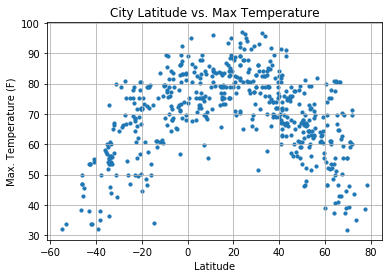

In [7]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Humidity Plot

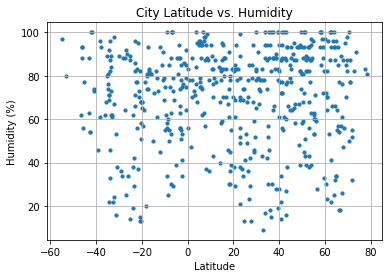

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")
# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

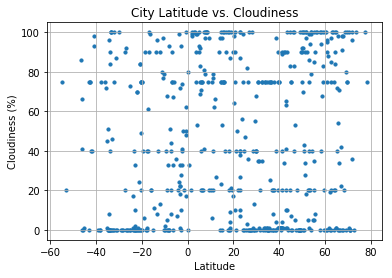

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

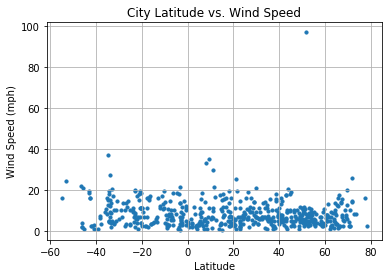

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()